In [2]:
# In this NoteBook, we are going to explore the MNIST Dataset which is a dataset contining 
# different ways that 0-9 was written. The data is divided into the ,data and the .target. 
# we'll start training with sklearn

import numpy as np
import pandas as pd
import  tensorflow as tf
import matplotlib.pyplot as plt
import keras.layers



In [3]:
from sklearn.datasets import fetch_openml

X_mnist, y_mnist = fetch_openml('mnist_784', return_X_y=True, as_frame=False,
                               parser='auto')


In [3]:
X_mnist[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

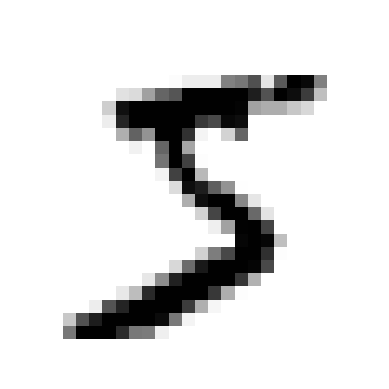

In [4]:
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X_mnist[0]
plot_digit(some_digit)

plt.show()


In [5]:
y_mnist[0]

'5'

In [4]:
# The data target is the label, while the main data is a collection of pizel that represent the 
# digit. Spo we split the data first.

X_train, y_train = X_mnist[:50_000], y_mnist[:50_000]
X_valid, y_valid = X_mnist[50_000:60_000], y_mnist[50_000:60_000]
X_test, y_test = X_mnist[60_000:], y_mnist[60_000:]

In [7]:
# Let us use a simple SGDClassifier and see how it performs. 
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

sgd_clf = make_pipeline(StandardScaler(),PCA(n_components=0.95,random_state=42),
                        SGDClassifier(random_state=42))

param_grid = {
             "sgdclassifier__alpha": [1e-4, 1e-4, 1e-2],
             "sgdclassifier__penalty": ["l2", "l1", "elasticnet"],
             "sgdclassifier__loss": ["log_loss", "hinge"],
             "sgdclassifier__max_iter": [1000],
             "sgdclassifier__tol": [1e-3],
             }

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(sgd_clf, param_grid, cv=cv, n_jobs=-1, verbose=1)
grid_search.fit(X_train[:5000], y_train[:5000])




Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('pca',
                                        PCA(n_components=0.95,
                                            random_state=42)),
                                       ('sgdclassifier',
                                        SGDClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'sgdclassifier__alpha': [0.0001, 0.0001, 0.01],
                         'sgdclassifier__loss': ['log_loss', 'hinge'],
                         'sgdclassifier__max_iter': [1000],
                         'sgdclassifier__penalty': ['l2', 'l1', 'elasticnet'],
                         'sgdclassifier__tol': [0.001]},
             verbose=1)

In [8]:
sgd_grid_bestmodel = grid_search.best_estimator_

In [9]:
from sklearn.metrics import accuracy_score

y_pred = sgd_grid_bestmodel.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)

print(f"Accuracy:{accuracy:.4f}")

Accuracy:0.8996


In [10]:
# We got an accuracy of 90%. Let's try a Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

rf_clf = make_pipeline(
    PCA(n_components=0.95, random_state=42),
    RandomForestClassifier(random_state=42)
)

param_grid = {
    "randomforestclassifier__n_estimators":[100, 200],
    "randomforestclassifier__max_depth": [None, 10, 20],
    "randomforestclassifier__max_features": ["sqrt", "log2"],
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    rf_clf, param_grid, cv=cv, n_jobs=-1, verbose=1
)

grid_search.fit(
    X_train, y_train
)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('pca',
                                        PCA(n_components=0.95,
                                            random_state=42)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': [None, 10, 20],
                         'randomforestclassifier__max_features': ['sqrt',
                                                                  'log2'],
                         'randomforestclassifier__n_estimators': [100, 200]},
             verbose=1)

In [11]:
rf_rand_bestmodel = grid_search.best_estimator_

y_pred = rf_rand_bestmodel.predict(X_valid)

accuracy = accuracy_score(y_valid, y_pred)

accuracy

0.9537

In [12]:
# So we have gotten a 95% accuracy using randomforests. 
# Let us try and use a different model. 

In [13]:
# Next we are going to try a differentvtype of Classifier. The KNeighborsClassifier. After some
# research, it was discoveered to be the best for this particular dataset. We'll use GridSearch
# To hypertune the weights then we'll work on the data set. 

from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

accuracy = knn_clf.score(X_valid, y_valid)

accuracy

0.9718

In [14]:
# Oh, we got an accuracy of 97% from a regular KNN classifier
# Let us measure recall and the precision value

from sklearn.metrics import confusion_matrix

y_pred = knn_clf.predict(X_valid)

print(confusion_matrix(y_valid, y_pred))

[[ 984    0    3    0    0    0    2    0    0    2]
 [   0 1060    1    0    1    0    1    1    0    0]
 [   4    9  954    1    1    1    1   16    1    2]
 [   0    0    5 1006    0    6    1    3    7    2]
 [   0   10    1    0  947    0    0    2    0   23]
 [   2    2    1   17    3  870   16    2    0    2]
 [   3    0    0    0    0    1  963    0    0    0]
 [   0   10    1    0    3    0    0 1069    0    7]
 [   3    8    1   15    4   16    4    5  944    9]
 [   4    3    0   10   12    2    0    7    2  921]]


In [15]:
from sklearn.metrics import classification_report

print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       991
           1       0.96      1.00      0.98      1064
           2       0.99      0.96      0.97       990
           3       0.96      0.98      0.97      1030
           4       0.98      0.96      0.97       983
           5       0.97      0.95      0.96       915
           6       0.97      1.00      0.99       967
           7       0.97      0.98      0.97      1090
           8       0.99      0.94      0.96      1009
           9       0.95      0.96      0.95       961

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [16]:
# Now let's hyertune it with GridSearch
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 3, 5, 6]}]

grid_search = GridSearchCV(knn_clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 3, 5, 6],
                          'weights': ['uniform', 'distance']}])

In [17]:
knn_best_model = grid_search.best_estimator_
y_pred = knn_best_model.predict(X_valid)

tunned_accuracy = accuracy_score(y_pred, y_valid)

In [18]:
tunned_accuracy

0.9741

In [6]:
# Now, let us try using a voting classifier using KNNs, ExtraTrees(a variant of RandTrees),
# RandomForests & MLP. We'll train them individually then together to compare results

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
extra_trees_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
knn_clf = KNeighborsClassifier()
mlp_clf = MLPClassifier(random_state=42)

estimators = [random_forest_classifier, extra_trees_clf, knn_clf, mlp_clf]

for estimator in estimators:
    print("Training the", estimator)
    estimator.fit(X_train, y_train)

Training the RandomForestClassifier(random_state=42)
Training the ExtraTreesClassifier(random_state=42)
Training the KNeighborsClassifier()
Training the MLPClassifier(random_state=42)


In [7]:
[estimator.score(X_valid, y_valid) for estimator in estimators]

[0.9736, 0.9743, 0.9718, 0.9646]

In [8]:
from sklearn.ensemble import VotingClassifier

named_estimators = [
    ("random_forest_classifier", random_forest_classifier),
    ("extra_trees_clf", extra_trees_clf),
    ("knn_clf", knn_clf),
    ("mlp_clf", mlp_clf),
]

voting_clf = VotingClassifier(named_estimators)
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('random_forest_classifier',
                              RandomForestClassifier(random_state=42)),
                             ('extra_trees_clf',
                              ExtraTreesClassifier(random_state=42)),
                             ('knn_clf', KNeighborsClassifier()),
                             ('mlp_clf', MLPClassifier(random_state=42))])

In [9]:
voting_clf.score(X_valid, y_valid)

0.9781

In [10]:
voting_clf.voting = "soft"

voting_clf.score(X_valid, y_valid)

0.9773

In [11]:
voting_clf.voting = "hard"

voting_clf.score(X_valid, y_valid)

0.9781

In [19]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [20]:
X_train_full.shape

(60000, 28, 28)

In [21]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

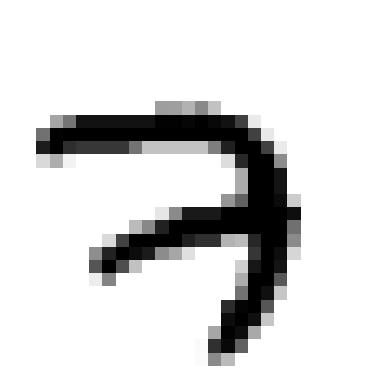

In [22]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()


In [23]:
y_train[0]

np.uint8(7)

In [24]:
X_valid.shape

(5000, 28, 28)

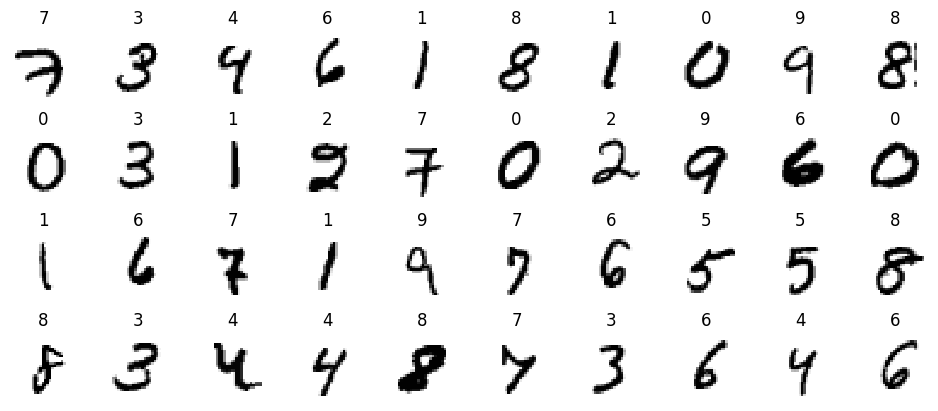

In [25]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

In [26]:
K = tf.keras.backend

class ExponentialLearningRate(tf.keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []

    def on_batch_end(self, batch, logs=None):
        lr = self.model.optimizer.learning_rate.numpy() * self.factor
        self.model.optimizer.learning_rate = lr
        self.rates.append(lr)
        self.losses.append(logs["loss"])

In [27]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [28]:
# First we will try to determine the best learning rate 
model = tf.keras.Sequential([
    tf.keras.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                ┃ Output Shape        ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ flatten (Flatten)           │ (None, 784)         │           0 │
├─────────────────────────────┼─────────────────────┼─────────────┤
│ dense (Dense)               │ (None, 300)         │     235,500 │
├─────────────────────────────┼─────────────────────┼─────────────┤
│ dense_1 (Dense)             │ (None, 100)         │      30,100 │
├─────────────────────────────┼─────────────────────┼─────────────┤
│ dense_2 (Dense)             │ (None, 10)          │       1,010 │
└─────────────────────────────┴─────────────────────┴─────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
             metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

In [31]:
history = model.fit(X_train, y_train, epochs=1, # For the test
                   validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.5436 - loss: nan - val_accuracy: 0.0958 - val_loss: nan


Text(0, 0.5, 'Loss')

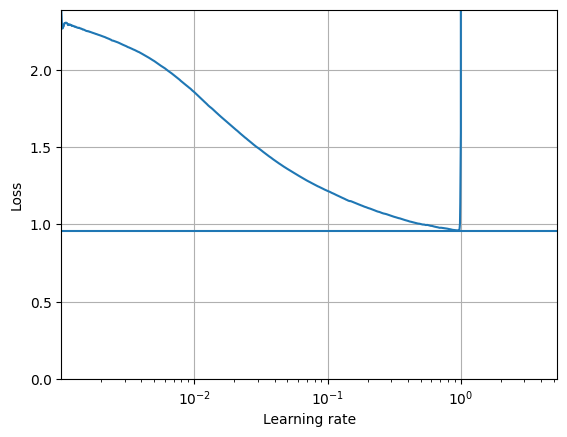

In [32]:
# Plot the diagram to see where the learning rate rate spikes
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel('Learning rate')
plt.ylabel('Loss')

In [33]:
# The loss starts shooting back up violently when the learning rate goes over 6e-1, 
# so let's try using half of that, at 3e-1

tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [34]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [35]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                ┃ Output Shape        ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ flatten (Flatten)           │ (None, 784)         │           0 │
├─────────────────────────────┼─────────────────────┼─────────────┤
│ dense (Dense)               │ (None, 300)         │     235,500 │
├─────────────────────────────┼─────────────────────┼─────────────┤
│ dense_1 (Dense)             │ (None, 100)         │      30,100 │
├─────────────────────────────┼─────────────────────┼─────────────┤
│ dense_2 (Dense)             │ (None, 10)          │       1,010 │
└─────────────────────────────┴─────────────────────┴─────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
optimizer = tf.keras.optimizers.SGD(learning_rate=3e-1)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
             metrics=["accuracy"])

In [37]:
from pathlib import Path

run_index = 1
run_logdir = Path() / "my_newmnist_logs" / "run_{:03d}".format(run_index)
run_logdir

WindowsPath('my_newmnist_logs/run_001')

In [38]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_newmnist_model.keras", 
                                                    save_best_only=True)
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                   validation_data=(X_valid, y_valid),
                   callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8691 - loss: 0.4067 - val_accuracy: 0.9722 - val_loss: 0.0957
Epoch 2/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9698 - loss: 0.0990 - val_accuracy: 0.9724 - val_loss: 0.0888
Epoch 3/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.9813 - loss: 0.0612 - val_accuracy: 0.9758 - val_loss: 0.0835
Epoch 4/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9863 - loss: 0.0423 - val_accuracy: 0.9774 - val_loss: 0.0825
Epoch 5/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9903 - loss: 0.0317 - val_accuracy: 0.9778 - val_loss: 0.0824
Epoch 6/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9915 - loss: 0.0254 - val_accuracy: 0.9780 - val_loss: 0.0912
Epoch 7/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.9923 - loss: 0.0230 - val_accuracy: 0.9762 - val_loss: 0.0997
Epoch 8/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0

In [39]:
model = tf.keras.models.load_model("my_newmnist_model.keras")
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9723 - loss: 0.1003


[0.07835301756858826, 0.9779000282287598]

In [40]:
# I got an accuracy of about 97%. With more experiments and tuning, i think I can get 
# better results. 

In [3]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False, parser="auto")

X_train = mnist.data[:60000]
y_train = mnist.target[:60000]

X_test = mnist.data[60000:]
y_test = mnist.target[60000:]

In [4]:
X_sample, y_sample = X_train[:5000], y_train[:5000]

In [5]:
from sklearn.manifold import TSNE 

tsne = TSNE(n_components=2, init="random", learning_rate="auto",
           random_state=42)
%time X_reduced = tsne.fit_transform(X_sample)

CPU times: total: 4min 6s
Wall time: 1min 12s


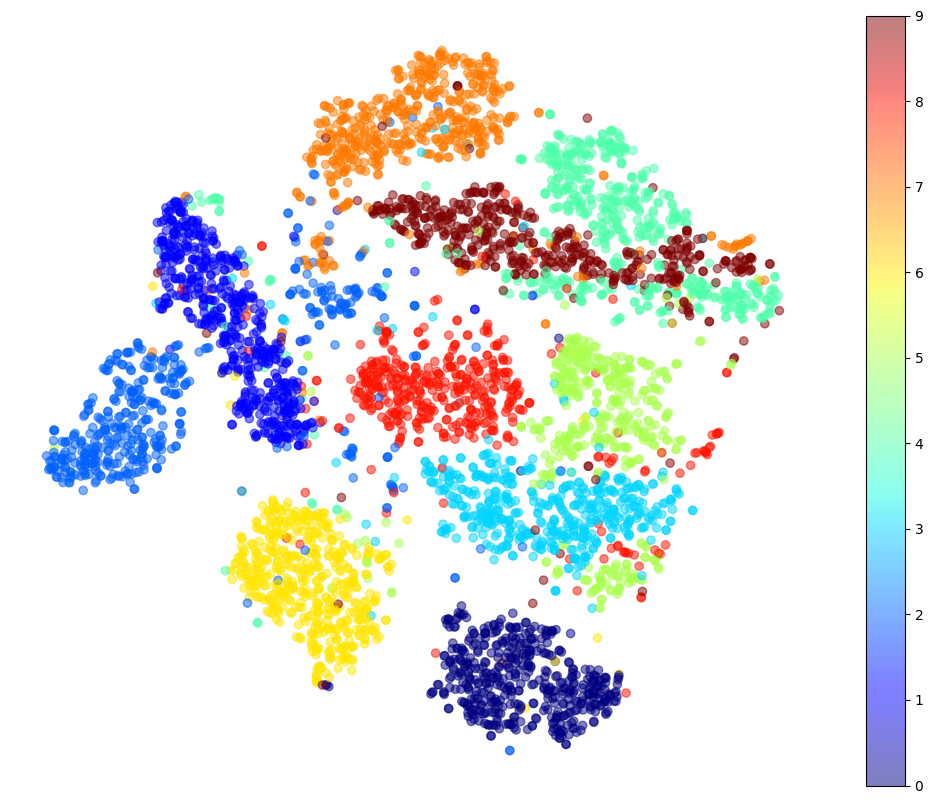

In [7]:
plt.figure(figsize=(13, 10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1],
           c=y_sample.astype(np.int8), cmap="jet", alpha=0.5)
plt.axis('off')
plt.colorbar()

plt.show()

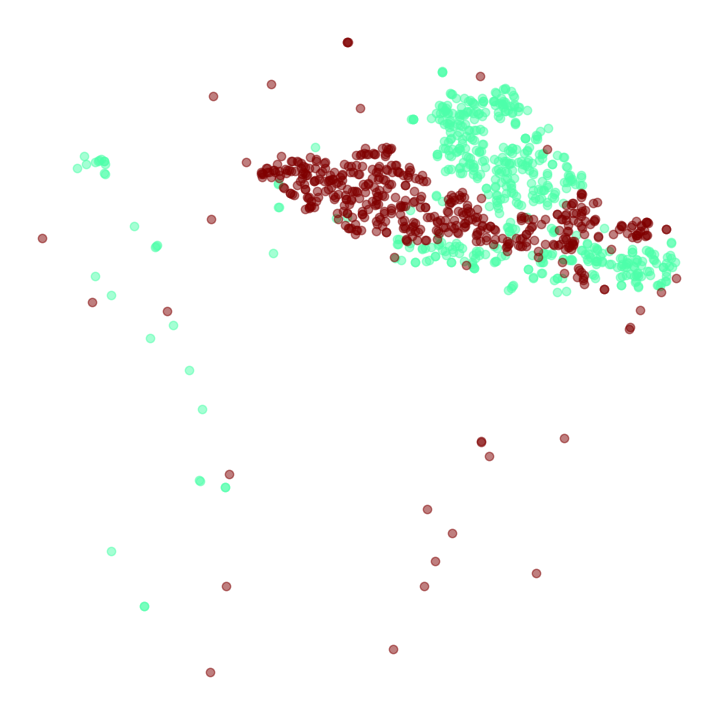

In [10]:
# The T-SNE wasn't given target, but we can identify a cluster of images that are seperated from
# each other.  Now let us just focus on 4 and 9 clusters.

plt.figure(figsize=(9, 9))
cmap = plt.cm.jet
for digit in ('4', '9'):
    plt.scatter(X_reduced[y_sample == digit, 0], X_reduced[y_sample == digit, 1],
               c=[cmap(float(digit) / 9)], alpha=0.5)
plt.axis('off')
plt.show()
    

In [11]:
# Let us try to produce a nicer image runnig t-SNE on just 2 digits

idx = (y_sample == '4') | (y_sample == '9')
X_subset = X_sample[idx]
y_subset = y_sample[idx]

tsne_subset = TSNE(n_components=2, init="random", learning_rate="auto",
                  random_state=42)
X_subset_reduced = tsne_subset.fit_transform(X_subset)

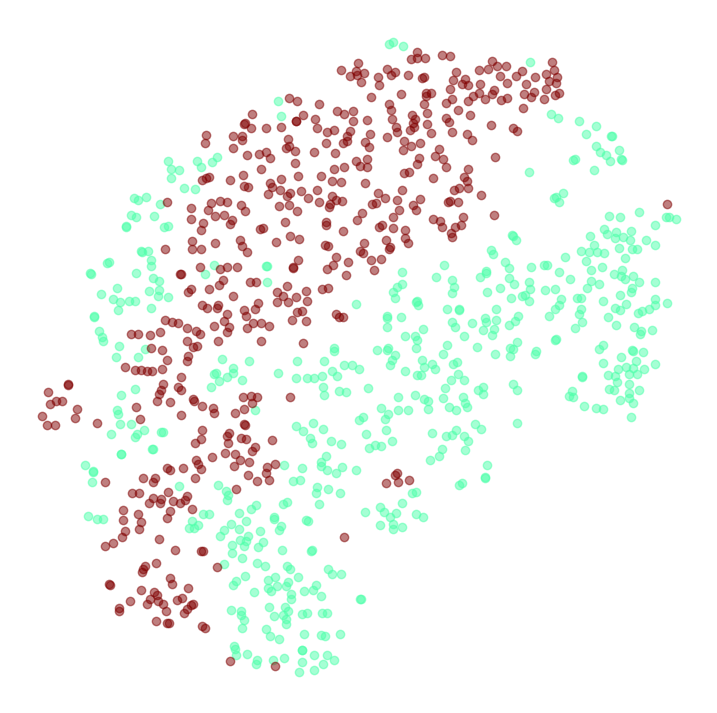

In [12]:
plt.figure(figsize=(9, 9))
for digit in ('4', '9'):
    plt.scatter(X_subset_reduced[y_subset == digit, 0],
               X_subset_reduced[y_subset == digit, 1],
               c=[cmap(float(digit) / 9)],alpha=0.5)

plt.axis('off')
plt.show()

In [16]:
# Next lets create a plt_digits func that draw a scatterplot write the coloured digits, with 
# minimum distance. 

from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.04, images=None, figsize=(13, 10)):
    # Scaling the input features so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
    # Now we create the list pf cordinates of the digits plotted so far. 

    neighbors = np.array([[10., 10.]])
    plt.figure(figsize=figsize)
    cmap = plt.cm.jet
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1],
                   c=[cmap(float(digit) / 9)], alpha=0.5)

    plt.axis("off")
    ax = plt.gca() # getting our current axes
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(neighbors - image_coord, axis =1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                        color=cmap(float(y[index]) / 9),
                        fontdict={"weight":"bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"),
                                         image_coord)
                ax.add_artist(imagebox)

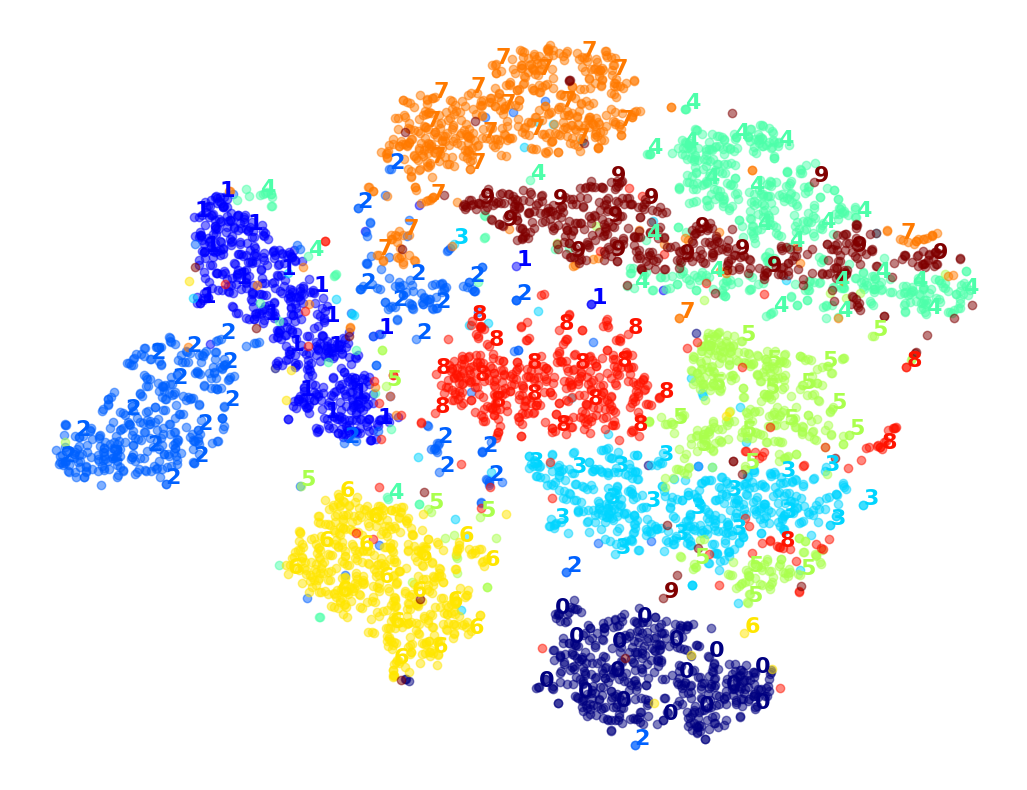

In [17]:
plot_digits(X_reduced, y_sample)

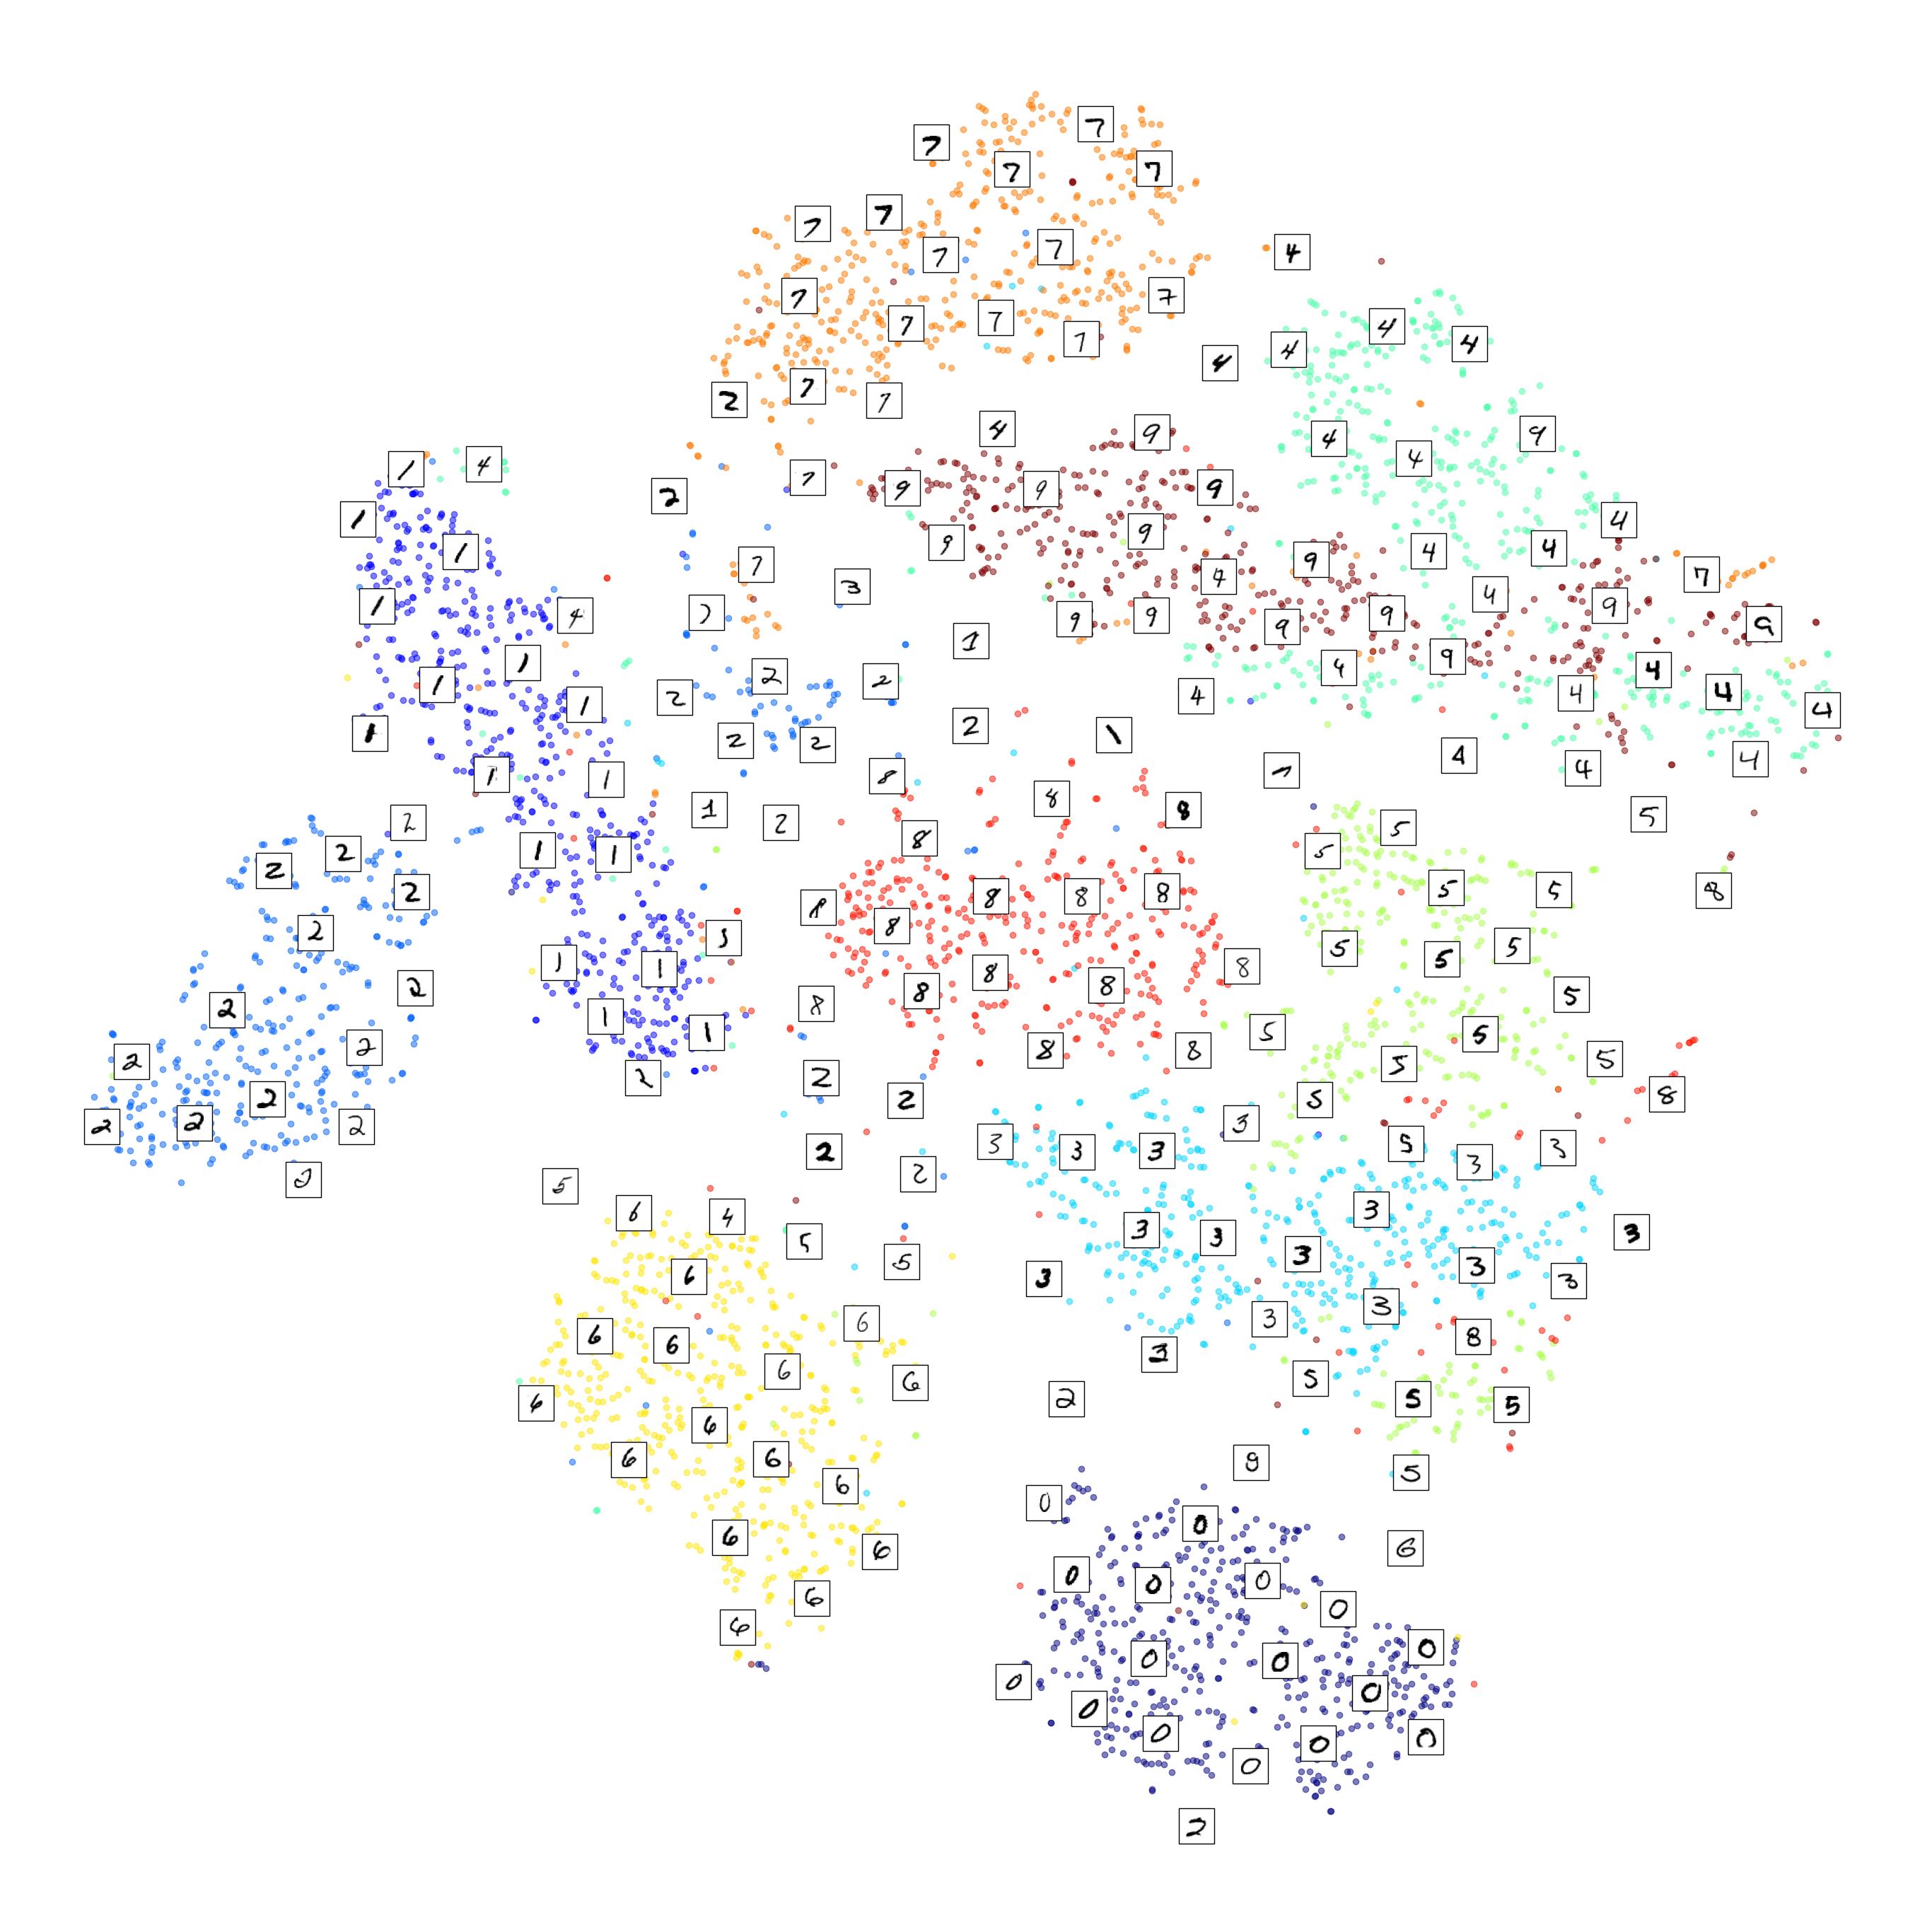

In [18]:
plot_digits(X_reduced, y_sample, images=X_sample, figsize=(35, 35))

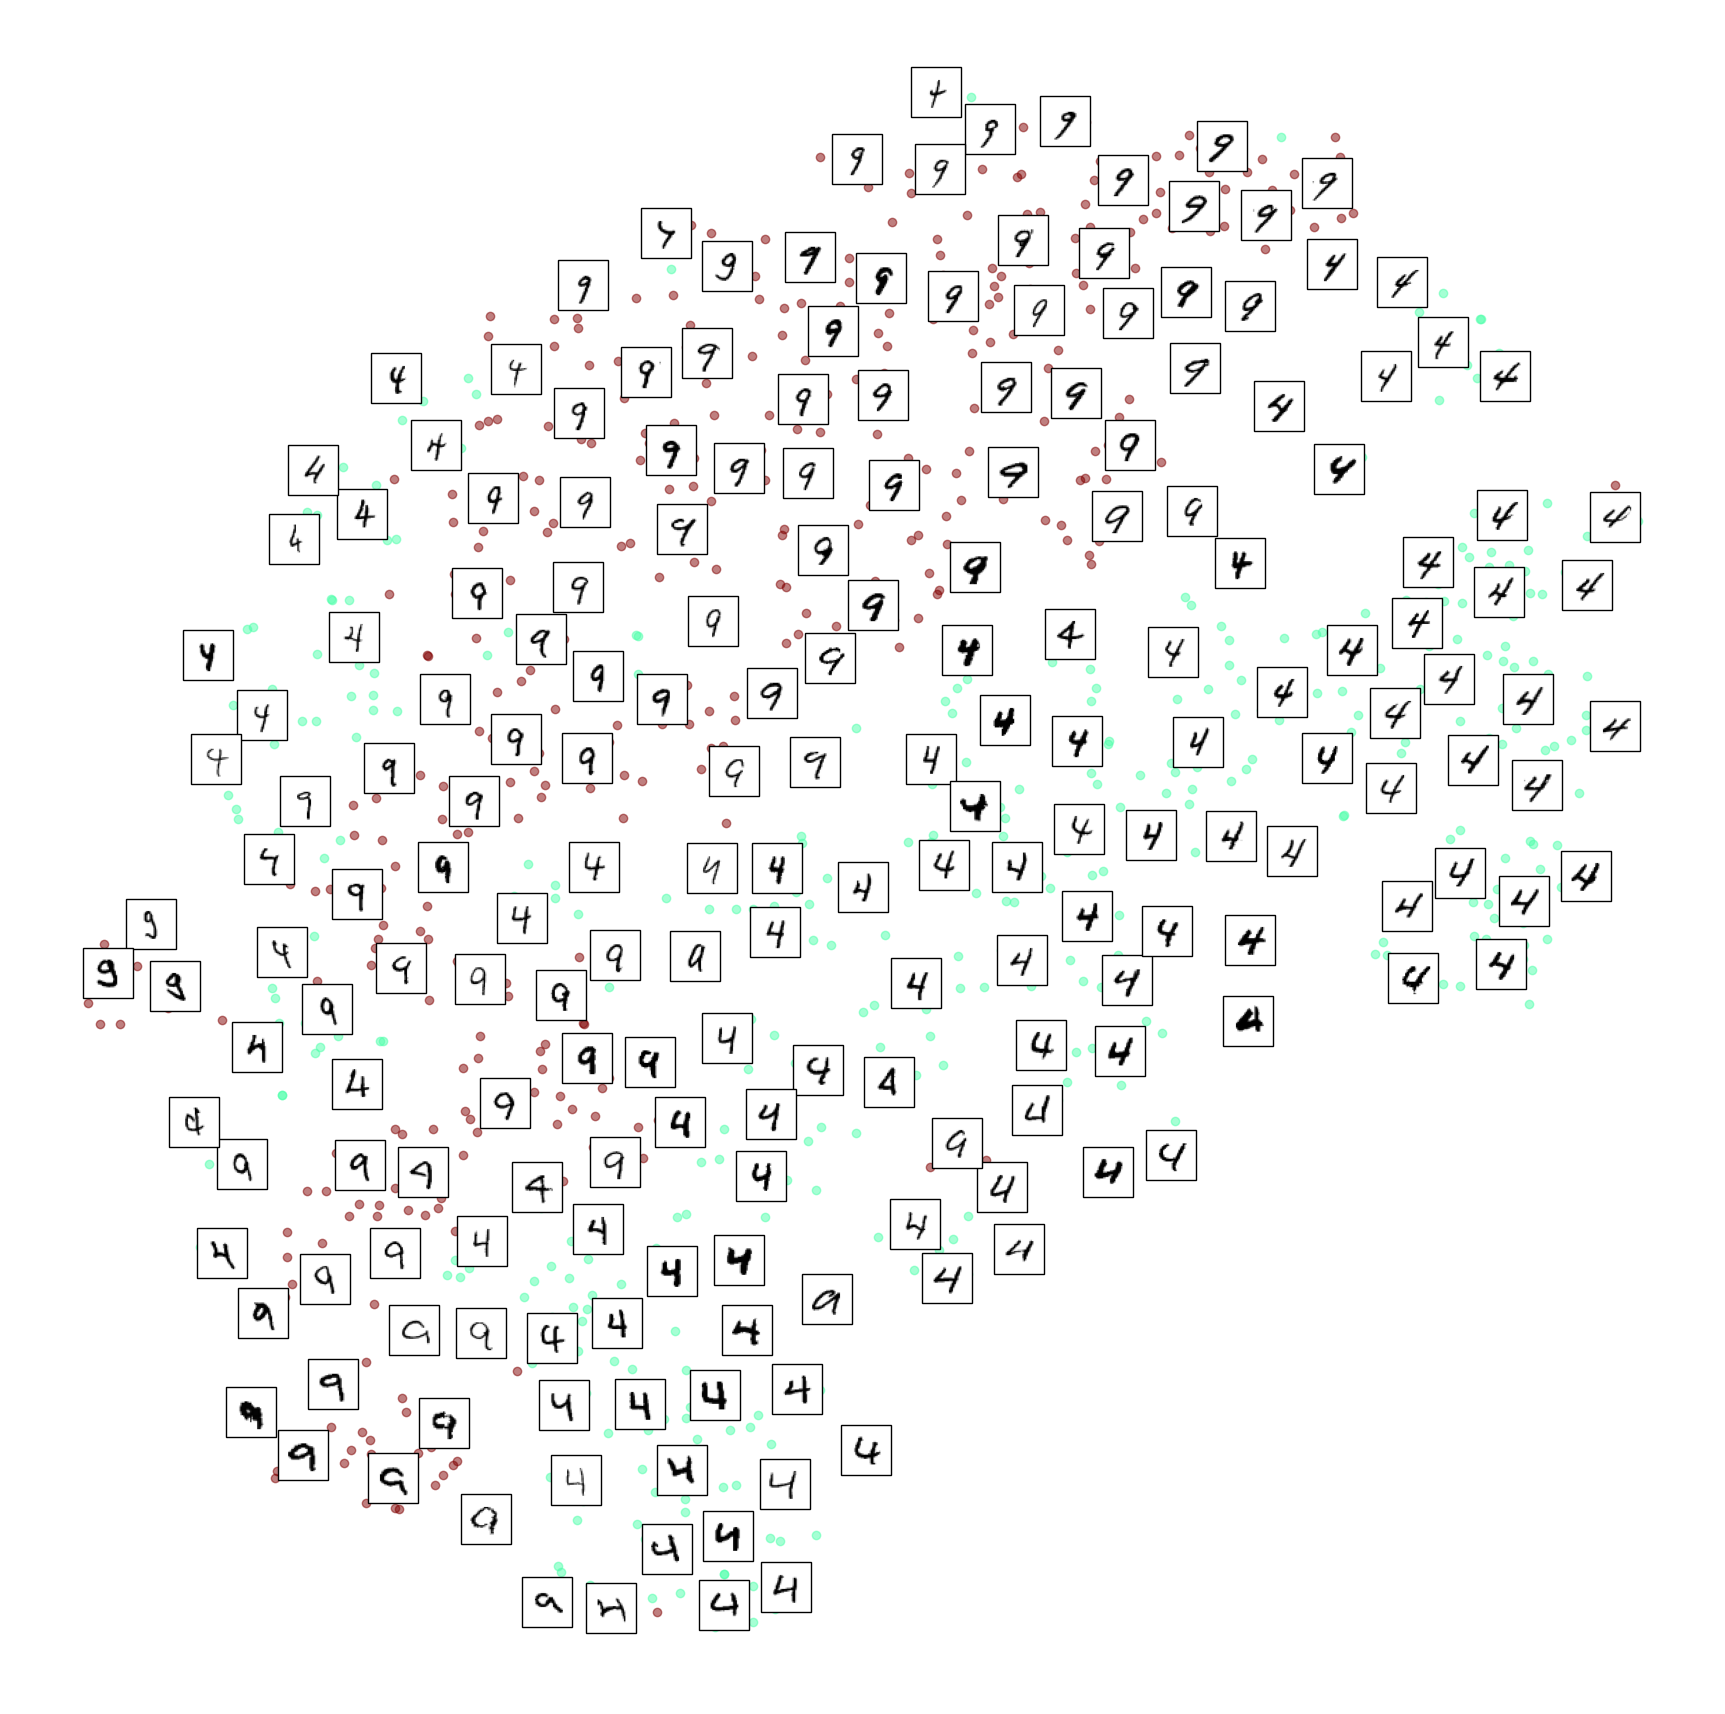

In [19]:
plot_digits(X_subset_reduced, y_subset, images=X_subset, figsize=(22, 22))

CPU times: total: 625 ms
Wall time: 294 ms


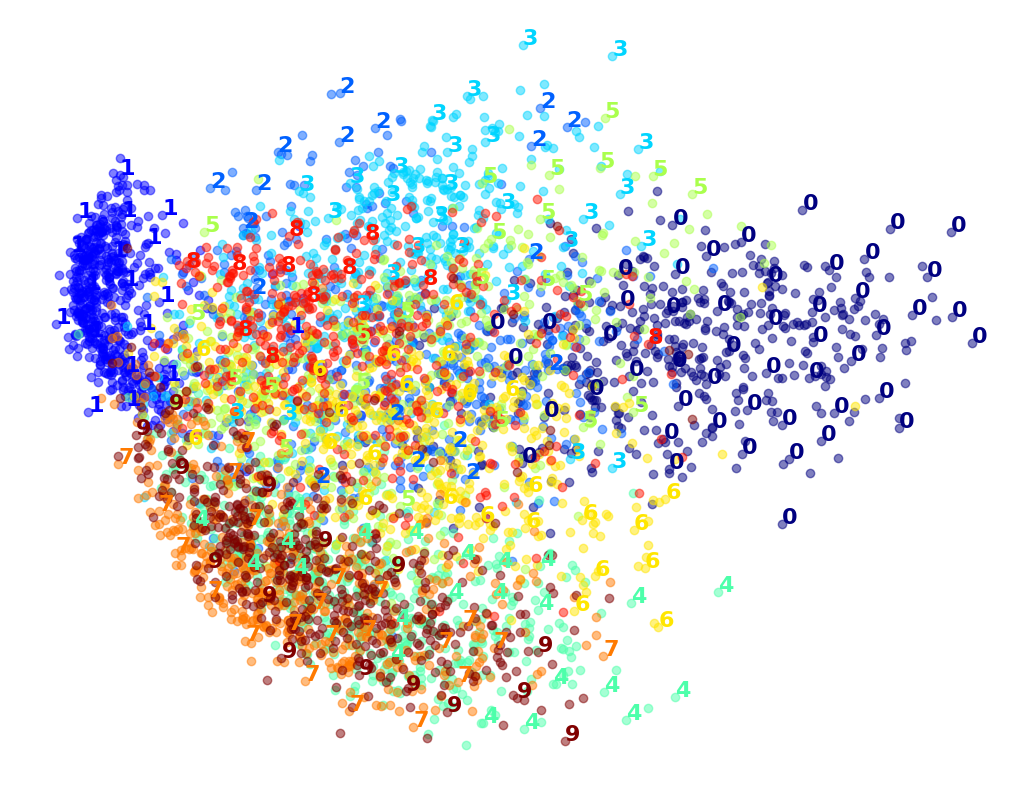

In [20]:
# Let's try using PCA to reduce the dimension of the dataset

from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
%time X_pca_reduced = pca.fit_transform(X_sample)
plot_digits(X_pca_reduced, y_sample)

plt.show()

CPU times: total: 4.95 s
Wall time: 2.76 s


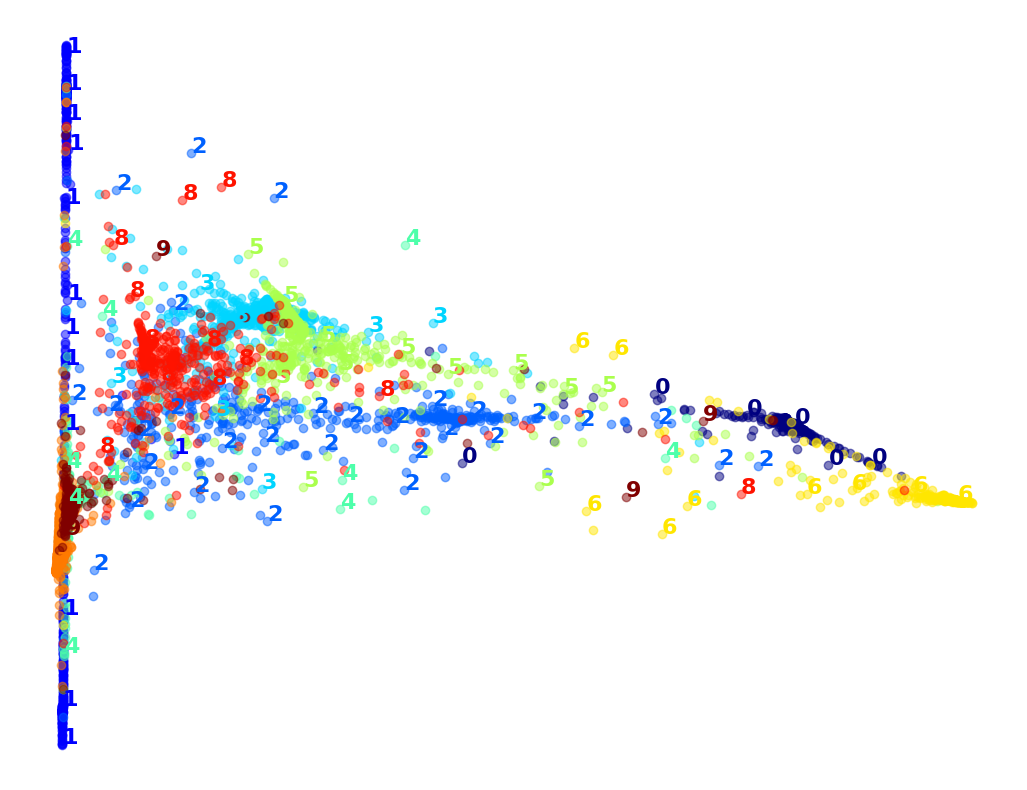

In [23]:
# Let's try LLE 
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, random_state=42)
%time X_lle_reduced = lle.fit_transform(X_sample)
plot_digits(X_lle_reduced, y_sample)

plt.show()

CPU times: total: 6.5 s
Wall time: 3.26 s


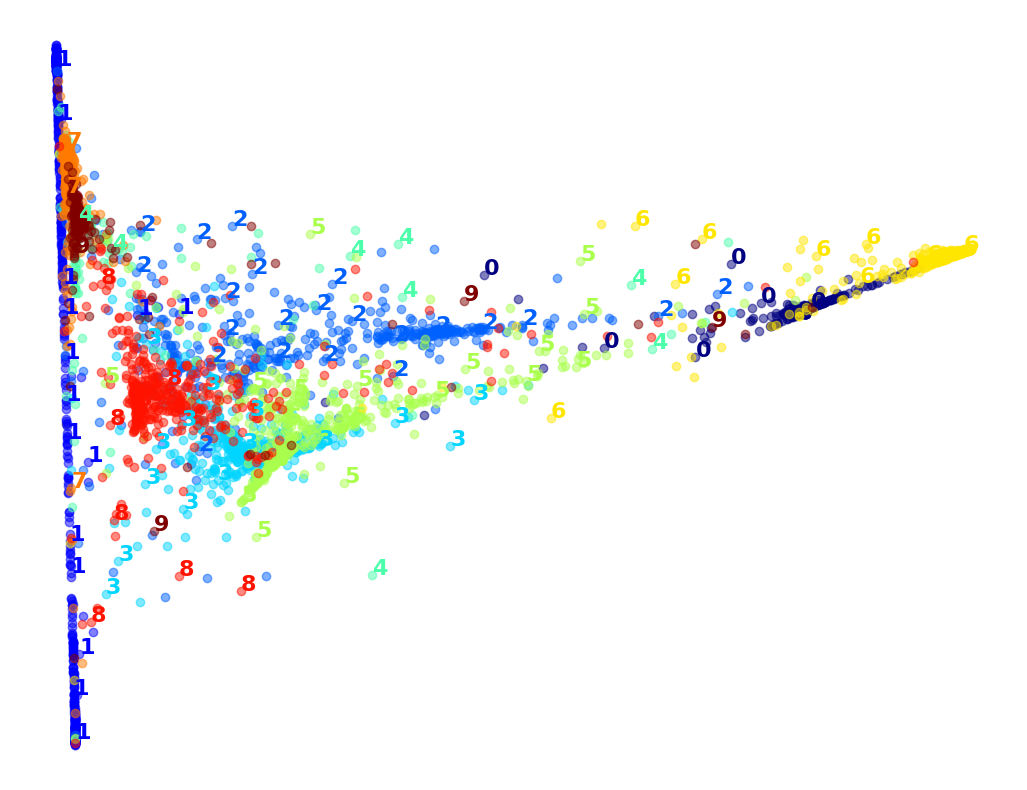

In [24]:
# Let us tru PCA with LLE
from sklearn.pipeline import make_pipeline

pca_lle = make_pipeline(PCA(n_components=0.95), 
                       LocallyLinearEmbedding(n_components=2, random_state=42))

%time X_pca_lle_reduced = pca_lle.fit_transform(X_sample)
plot_digits(X_pca_lle_reduced, y_sample)

plt.show()

In [ ]:
from sklearn.manifold import MDS

%time X_mds_reduced = MDS(n_components=2, normalized_stress=False, 
                          random_state=42).fit_transform(X_sample)
plot_digits(X_mds_reduced, y_sample)

plt.show()

In [ ]:
pca_mds = make_pipeline(
    PCA(n_components=0.95, random_state=42),
    MDS(n_components=2, normalized_stress=False, random_state=42)
)

%time X_pca_mds_reduced = pca_mds.fit_transform(X_sample)
plot_digits(X_pca_mds_reduced, y_sample)
plt.show()

In [ ]:
# Let's try LDA

from sklearn.discriminant_